# Import Libraries

In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Import & View Data

In [2]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Summary statistics
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


SibSp, Parch, and Ticket columns have large standard deviations compared to their means, possibly due to outliers.

In [6]:
# Check for missing values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are quite a few missing values in Age and Cabin, and 2 in Embarked.

In [7]:
# Check for duplicated values
train.duplicated().sum()

0

/tmp/ipykernel_20/2395587680.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = train.corr().abs()


<Axes: >

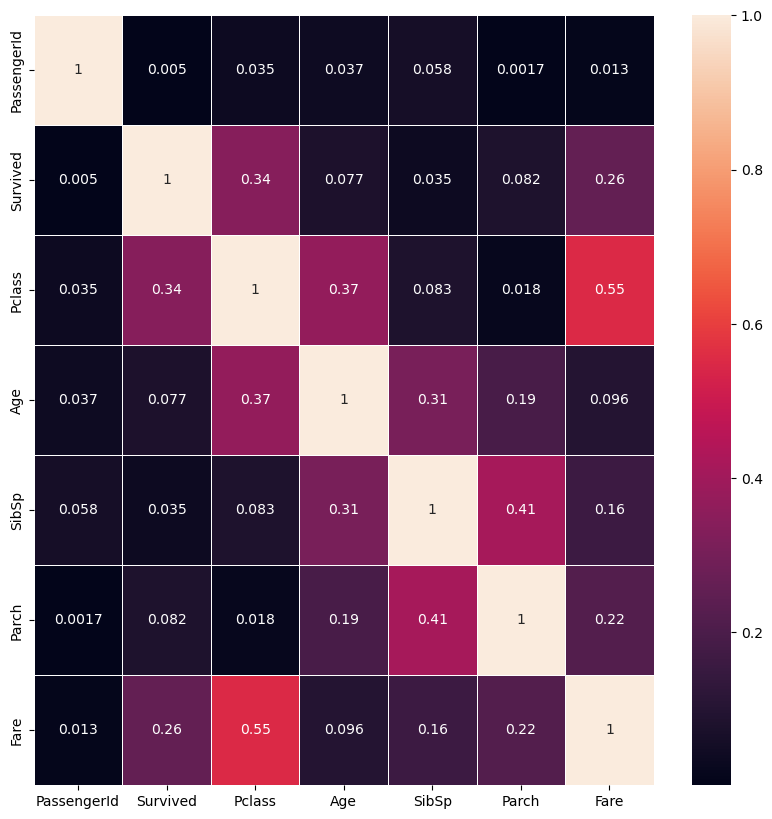

In [8]:
# Look at correlations
correlations = train.corr().abs()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(correlations, annot=True, linewidths=.5, ax=ax)

# Data Preparation

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 640x480 with 0 Axes>

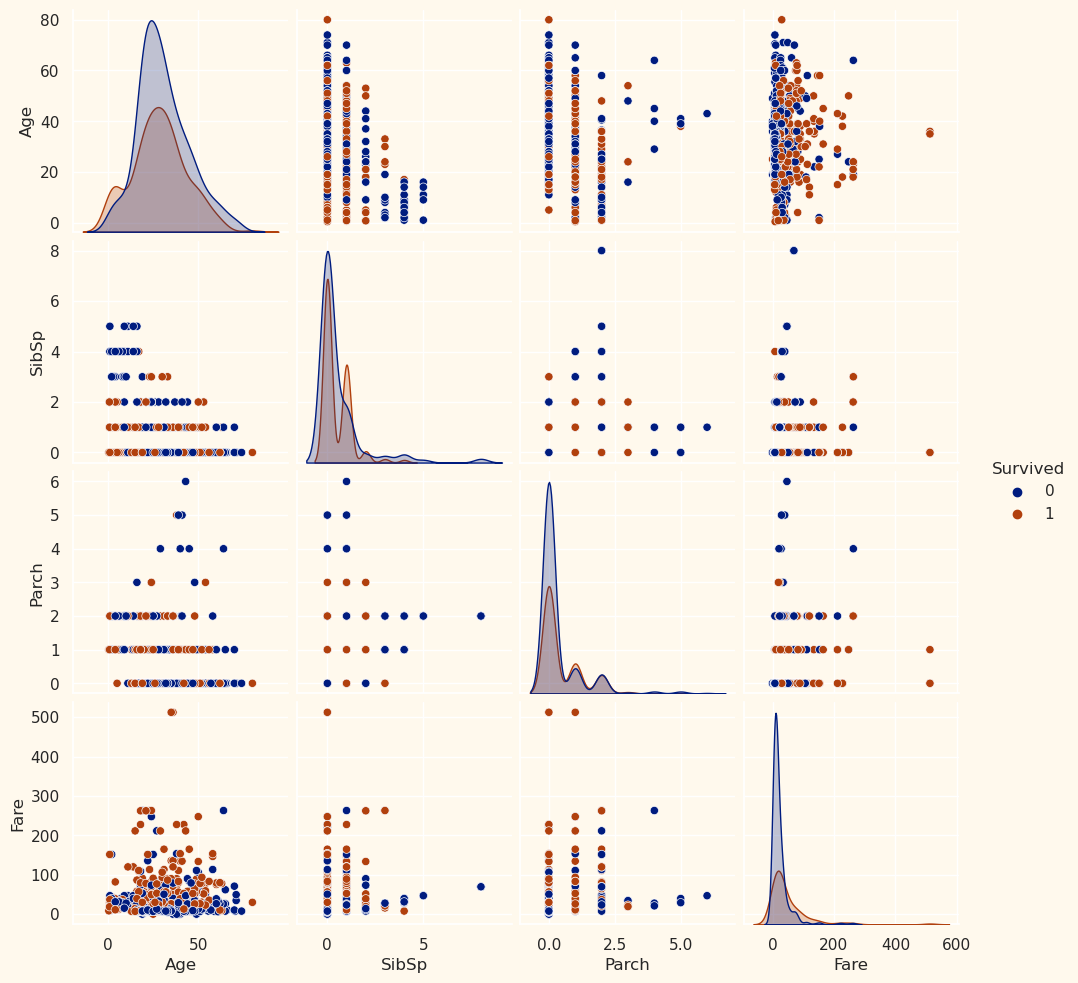

In [9]:
#Lets visialize the numerical continous features for outliers
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(train[[ "Survived","Age","SibSp", "Parch","Fare"]], hue= "Survived",palette= "dark")

In [10]:
#Dropping the outliers by setting a cap on SibSp and Fare. 
print("The total number of data-points before removing the outliers are:", len(train))
train = train[(train["SibSp"]<6)]
train = train[(train["Fare"]<350)]
train = train[(train["Parch"]<5)]
print("The total number of data-points after removing the outliers are:", len(train))

The total number of data-points before removing the outliers are: 891
The total number of data-points after removing the outliers are: 875


# Exploratory Data Analysis

**Pclass**

3    478
1    213
2    184
Name: Pclass, dtype: int64


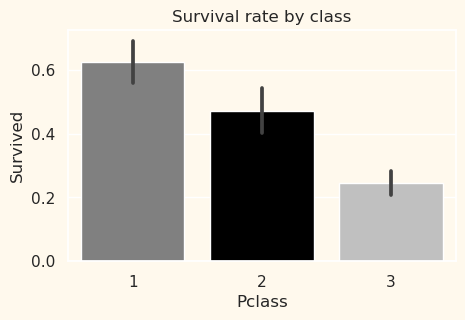

In [11]:
print(train["Pclass"].value_counts())

cols = ['grey','black','silver']
plt.figure(figsize=(5,3))   
sns.barplot(x = train["Pclass"], y = train["Survived"],palette=cols)
plt.title("Survival rate by class")
plt.show()

Note: Survival rate seems to increase with Pclass and more than 50% of passengers were in 3rd class. Pclass looks to be an important variable. 

**Name**

In [12]:
# Extracting salutation to check the correlation with Target 
train['Title'] = train['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

train['Title'].replace({'Mlle': 'Miss', 'Mme': 'Mrs', 'Ms': 'Miss'}, inplace = True)

train['Title'].replace(['Don', 'Rev', 'Dr', 'Major',  'Col', 'Capt', 'Jonkheer'],
                           'Rare Title', inplace = True)

train['Title'].replace(['the Countess', 'Lady', 'Sir'],'Honarary', inplace = True)

train['Title'].value_counts()

Mr            511
Miss          181
Mrs           121
Master         39
Rare Title     20
Honarary        3
Name: Title, dtype: int64

In [13]:
# Repeating same for test data
test['Title'] = test['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
test['Title'].replace({'Mlle': 'Miss', 'Mme': 'Mrs', 'Ms': 'Miss'}, inplace = True)
test['Title'].replace(['Don', 'Rev', 'Dr', 'Major',  'Col', 'Capt', 'Jonkheer'],
                           'Rare Title', inplace = True)
test['Title'].replace(['the Countess', 'Lady', 'Sir','Dona'],'Honarary', inplace = True)
test['Title'].value_counts()

Mr            240
Miss           79
Mrs            72
Master         21
Rare Title      5
Honarary        1
Name: Title, dtype: int64

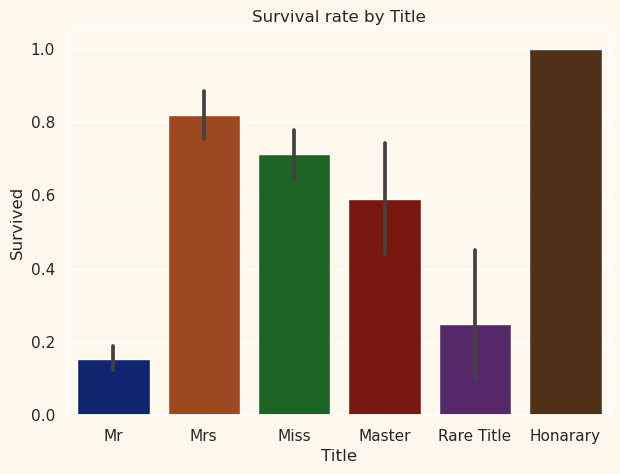

In [14]:
plt.figure(figsize=(7,5)) 
sns.barplot(x = train["Title"], y = train["Survived"],palette="dark")
plt.title("Survival rate by Title")
plt.show()

Note: There is a high survival rate for women (Mrs and Miss) and a low survival rate for men (Mr). Also, the 3 passengers with the Honarary title all survived. 

In [15]:
# To include for modelling lets map each of the title groups to a numerical value (Encoding)
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare Title": 5, "Honarary": 6}
train['Title'] = train['Title'].map(title_mapping)
test['Title'] = test['Title'].map(title_mapping)

In [16]:
# Dropping Name from both train and test
train = train.drop("Name",axis=1)
test = test.drop("Name",axis=1)
train.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2


**Sex**

male      570
female    305
Name: Sex, dtype: int64


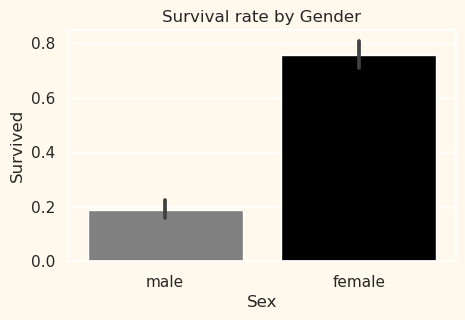

Survived,0,1
Sex,,
female,0.242623,0.757377
male,0.812281,0.187719


In [17]:
print(train["Sex"].value_counts())

cols = ['grey','black']
plt.figure(figsize=(5,3))   
sns.barplot(x = train["Sex"], y = train["Survived"],palette=cols)
plt.title("Survival rate by Gender")
plt.show()

pd.crosstab(train['Sex'], train['Survived'], normalize = 'index')

Women were indeed more likely to survive, their survival rate was approximately 75%, while men had only an 18% survival rate. 

In [18]:
# Map each Sex value to a numerical value
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

train.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2


**Age**

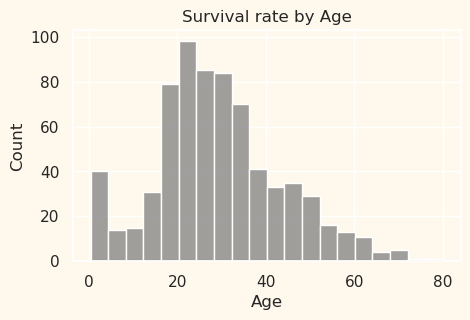

In [19]:
plt.figure(figsize=(5,3))   
sns.histplot(train["Age"],color="grey")
plt.title("Survival rate by Age")
plt.show()

In [20]:
# Replacing missing values with its Median 
train["Age"].replace(np.nan,train["Age"].median(), inplace=True)
test["Age"].replace(np.nan,test["Age"].median(), inplace=True)

# Bin names
bin_names=["Baby","Child","Teenager","Early Adult","Adult","Late Adult","Senior"]

# Sorting asc and drawing divider to the column
bins_train = np.linspace(min(train["Age"]),max(train["Age"]),8)
bins_test = np.linspace(min(test["Age"]),max(test["Age"]),8)

# Dividing the column
train["Age_binned"] = pd.cut(train["Age"],bins_train,labels = bin_names,include_lowest=True)
test["Age_binned"] = pd.cut(test["Age"],bins_test,labels = bin_names,include_lowest=True)

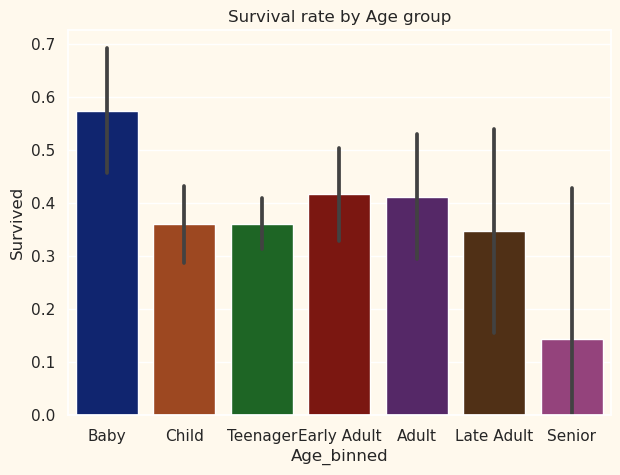

In [21]:
plt.figure(figsize=(7,5))
plt.title("Survival rate by Age group")
sns.barplot(x=train["Age_binned"],y=train["Survived"],palette="dark")
plt.show()

Note: Babies were more likely to survive.

In [22]:
# Converting to numerical data
title_mapping = {"Baby":1,"Child":2,"Teenager":3,"Early Adult":4,"Adult":5,"Late Adult":6,"Senior": 7}
train["Age_binned"] = train["Age_binned"].map(title_mapping)
test["Age_binned"] = test["Age_binned"].map(title_mapping)
train = train.drop("Age",axis=1)
test = test.drop("Age",axis=1)

**SibSp**

0    603
1    205
2     28
4     18
3     16
5      5
Name: SibSp, dtype: int64


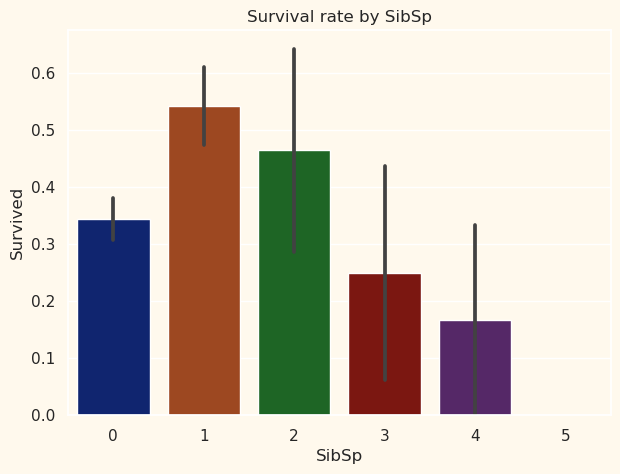

In [23]:
print(train["SibSp"].value_counts())

plt.figure(figsize=(7,5))
plt.title("Survival rate by SibSp")
sns.barplot(x=train["SibSp"],y=train["Survived"],palette='dark')
plt.show()

Note: People with 1 or 2 siblings or spouses are most likely to surivive. While anyone with not spouses/siblings or more than 2 are less likely to survive. 

**Parch**

0    676
1    117
2     73
3      5
4      4
Name: Parch, dtype: int64


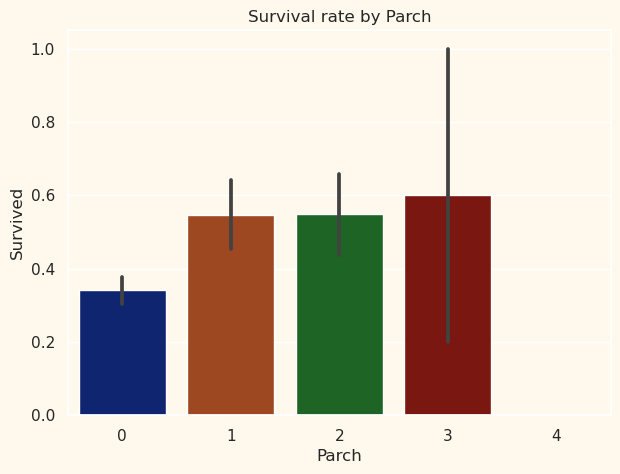

In [24]:
print(train["Parch"].value_counts())

plt.figure(figsize=(7,5))
plt.title("Survival rate by Parch")
sns.barplot(x=train["Parch"],y=train["Survived"],palette='dark')
plt.show()

Note: Passengers with 1-3 parents or children had a higher survival rate. 

**Ticket & Cabin**

In [25]:
# Considering to drop these two columns as Tikect dont contribute any information to predictive model and Cabin has ~80% missing values.
to_drop = ["Ticket","Cabin"]
train = train.drop(to_drop,axis=1)
test = test.drop(to_drop,axis=1)

**Fare**

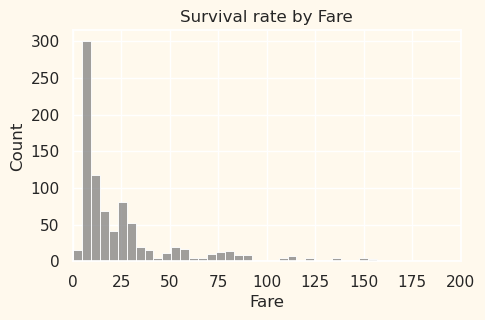

In [26]:
plt.figure(figsize=(5,3))  
plt.title("Survival rate by Fare")
plt.xlim(0,200)
sns.histplot(train["Fare"],color="grey")
plt.show()

In [27]:
#Replacig missing value with median in test data
test["Fare"].replace(np.nan,test["Fare"].median(), inplace=True)

mid         184
low         179
gold        173
premium     172
standard    167
Name: Fare_binned, dtype: int64


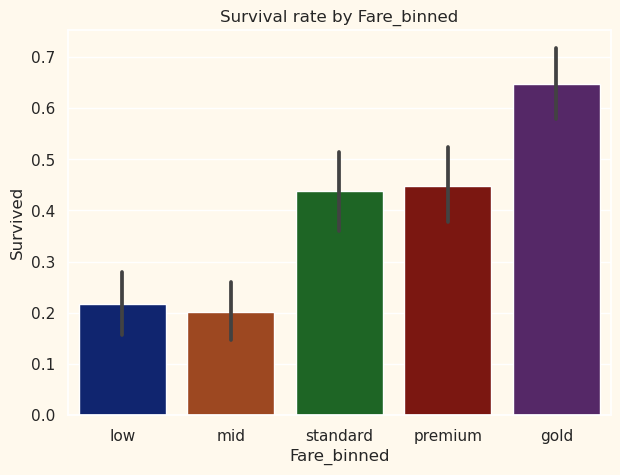

In [28]:
labels = ["low","mid","standard","premium","gold"]
train['Fare_binned'] = pd.qcut(train['Fare'],5,labels=labels)
test['Fare_binned'] = pd.qcut(test['Fare'], 5,labels=labels)
print(train['Fare_binned'].value_counts())

plt.figure(figsize=(7,5))
plt.title("Survival rate by Fare_binned")
sns.barplot(x=train["Fare_binned"],y=train["Survived"],palette='dark')
plt.show()

Note: The higher the fare price the higher the survival rate.

In [29]:
# Converting to numerical data
fare_mapping = {"low":1,"mid":2,"standard":3,"premium":4,"gold":5}
train["Fare_binned"] = train["Fare_binned"].map(fare_mapping)
test["Fare_binned"] = test["Fare_binned"].map(fare_mapping)
train = train.drop("Fare",axis=1)
test = test.drop("Fare",axis=1)

**Embarked**

S    632
C    165
Q     76
Name: Embarked, dtype: int64


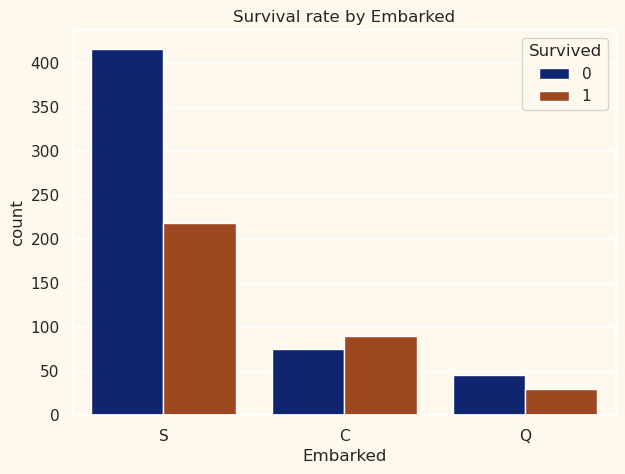

In [30]:
print(train["Embarked"].value_counts())

#Replacing missing values from train data with frequency to embarked column
train["Embarked"].replace(np.nan, train["Embarked"].mode()[0], inplace=True)

plt.figure(figsize=(7,5))
plt.title("Survival rate by Embarked")
sns.countplot(x="Embarked",hue ="Survived", data =train,palette='dark')
plt.show()

Note: Passengers who boarded the ship from Cherbourg had higher survival rate when compared to survival rate of other boarding locations.

In [31]:
# Map boarding locations
Embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(Embarked_mapping)
test['Embarked'] = test['Embarked'].map(Embarked_mapping)

**Split and Scale Data**

In [32]:
X = train[train.columns[~train.columns.isin(['PassengerId','Survived'])]]
y = train["Survived"] # Target Variable
scaler = StandardScaler()
X.head(3)

,Pclass,Sex,SibSp,Parch,Embarked,Title,Age_binned,Fare_binned
0,3,0,1,0,1,1,2,1
1,1,1,1,0,2,3,4,5
2,3,1,0,0,1,2,3,2


In [33]:
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled) # Predictor

**Modeling**

In [34]:
# To check Accurancy of different model, spliting Train_data into 80 % train and 20 % test is required.
x_train, x_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=314)

In [35]:
# Decision Tree

# Define hyperparameters to test
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5, 6, 7], 
    'min_samples_leaf': [0.05, 0.04, 0.03, 0.02],
    'min_samples_split': [2,3]
}
decisiontree = DecisionTreeClassifier(random_state=314)

tree_gs = GridSearchCV(decisiontree, param_grid, cv=3, verbose=2, n_jobs=-1)
tree_gs.fit(x_train, y_train)
ypred_decisiontree = tree_gs.predict(x_test)
acc_decisiontree = round(accuracy_score(ypred_decisiontree, y_test) * 100, 2)
print('Decision tree accuracy is: ', acc_decisiontree)
tree_gs.best_params_

Fitting 3 folds for each of 80 candidates, totalling 240 fits
Decision tree accuracy is:  77.71


{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 0.02,
 'min_samples_split': 2}

In [36]:
# Random Forest

# Define hyperparameters to test
param_grid = {
    'n_estimators': [50, 100, 150], 
    'max_depth': [5,10,15],
    'min_samples_split': [2,3],
    'min_samples_leaf': [1,2,3],
    'bootstrap': [True, False]
}

randomforest = RandomForestClassifier(random_state=314)

forest_gs = GridSearchCV(randomforest, param_grid, cv=3, verbose=2, n_jobs=-1)

forest_gs.fit(x_train, y_train)
ypred_randomforest = forest_gs.predict(x_test)
acc_randomforest = round(accuracy_score(ypred_randomforest, y_test) * 100, 2)
print('Random forest accuracy is: ', acc_randomforest)
forest_gs.best_params_

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END criterion=gini, max_depth=3, min_samples_leaf=0.05, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=0.04, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=0.04, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=0.03, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=0.03, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=0.02, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=0.05, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=0.05, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=0.05, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max

{'bootstrap': True,
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [37]:
# Gradient Boosting Classifier

# Define hyperparameters to test
param_grid = {
    'n_estimators': [100, 200, 300], 
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [3, 4],
    'min_samples_leaf': [0.02, 0.03, 0.04],
    'min_samples_split': [2, 3]
}

gbk = GradientBoostingClassifier(random_state=314)

gbk_gs = GridSearchCV(gbk, param_grid, cv=3, verbose=2, n_jobs=-1)
gbk_gs.fit(x_train, y_train)
ypred_gbk = gbk_gs.predict(x_test)
acc_gbk = round(accuracy_score(ypred_gbk, y_test) * 100, 2)
print('Gradient boosting accuracy is: ', acc_gbk)
gbk_gs.best_params_

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=150; total time=   0.6s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.4s
[CV] 

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_leaf': 0.03,
 'min_samples_split': 2,
 'n_estimators': 300}

In [38]:
# KNN

knn = KNeighborsClassifier()

knn.fit(x_train, y_train)
ypred_knn = knn.predict(x_test)
acc_knn = round(accuracy_score(ypred_knn, y_test) * 100, 2)
print('KNN accuracy is: ', acc_knn)

KNN accuracy is:  84.0


In [39]:
models = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'Gradient Boosting Classifier', 'KNN',],
    'Score': [acc_decisiontree, acc_randomforest, acc_gbk, acc_knn]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forest,84.57
3,KNN,84.00
2,Gradient Boosting Classifier,82.86
0,Decision Tree,77.71


Random Forest has the largest accuracy score, we'll make predictions using that model.

In [40]:
# First we'll train the model on the entire training dataset, then make predictions on test data, and finally output predictons to a csv file

# First standardize test data
test_id = test['PassengerId'] 
predictors = test[test.columns[~test.columns.isin(['PassengerId'])]]
scaler_test = StandardScaler()
predictors_scaled = scaler_test.fit_transform(predictors)

# Predict on test dataset
final_predictions = forest_gs.predict(predictors_scaled)

# Output predictions
output = pd.DataFrame({ 'PassengerId' : test_id, 'Survived': final_predictions })
output.to_csv('submission.csv', index=False)